In [65]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats
import os

In [66]:
datapath = os.path.join(os.getcwd(), "data")

In [68]:
w = np.zeros((1000, 1000))
for i, file in enumerate(sorted(os.listdir(datapath))):
    w[:, i] = np.sort(np.load(os.path.join(datapath, file)))

In [69]:
w.nbytes

8000000

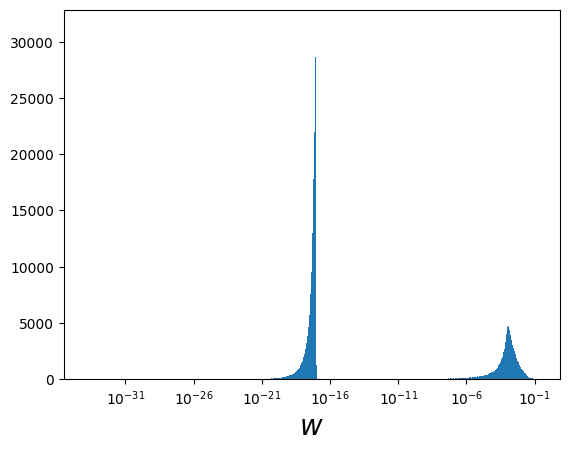

In [70]:
a = w.reshape(-1)
# a = a[a>1e-17]
fig, ax1 = plt.subplots()


hist, bins = np.histogram(a, bins=2000)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
  

ax1.hist(a, bins=logbins)

ax1.set_xscale('log')

ax1.set_xlabel('$w$', fontsize=20)

plt.show();

/tmp/ipykernel_17601/393708513.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


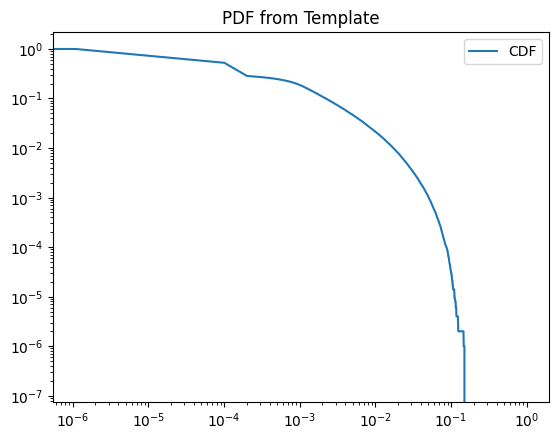

In [74]:
hist = np.histogram(a, bins=1000)
hist_dist = scipy.stats.rv_histogram(hist, density=False)

X = np.linspace(-.001, 1.0, 10000)

fig, ax = plt.subplots()

ax.set_title("PDF from Template")

ax.plot(X, 1 - hist_dist.cdf(X), label='CDF')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()

fig.show()
